#Preprocessing the historical data

In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sys
sys.path.append('/content/drive/MyDrive/studia/Inżynierka/MAIN')
import normalizations as norm
from statsmodels.tsa.stattools import adfuller #for stationary AUF test

In [93]:
#Reading the historical data
adbe = pd.read_csv('/content/drive/MyDrive/studia/Inżynierka/MAIN/adbe_hist.csv',usecols = ['Date','Close'])

adbe['Date'] = pd.to_datetime(adbe['Date'])
# Creating the 'iso_week' column to prepare the normalization of closing price
adbe['iso_week'] = adbe['Date'].dt.isocalendar().year.astype(str) + '-' + adbe['Date'].dt.isocalendar().week.astype(str)

In [67]:
print(adbe.info)

<bound method DataFrame.info of            Date   Close iso_week
0    1986-08-14    0.21  1986-33
1    1986-08-15    0.20  1986-33
2    1986-08-18    0.20  1986-34
3    1986-08-19    0.20  1986-34
4    1986-08-20    0.20  1986-34
...         ...     ...      ...
9605 2024-09-30  517.78  2024-40
9606 2024-10-01  502.80  2024-40
9607 2024-10-02  505.81  2024-40
9608 2024-10-03  503.80  2024-40
9609 2024-10-04  507.22  2024-40

[9610 rows x 3 columns]>


Our dataset contains 3 variables (columns). Each one of them represents:

1. Date: date of the observation.
2. Close: value at the close of the transaction Date.
3. iso_week: week number of a given year.

All values are in USD.

In [94]:
#Checking for missing values
missing_values = adbe.isnull().sum()

#Checking the presence of missing values
print("\nPresence of missing values:")
print(adbe.isnull().any())


Presence of missing values:
Date        False
Close       False
iso_week    False
dtype: bool


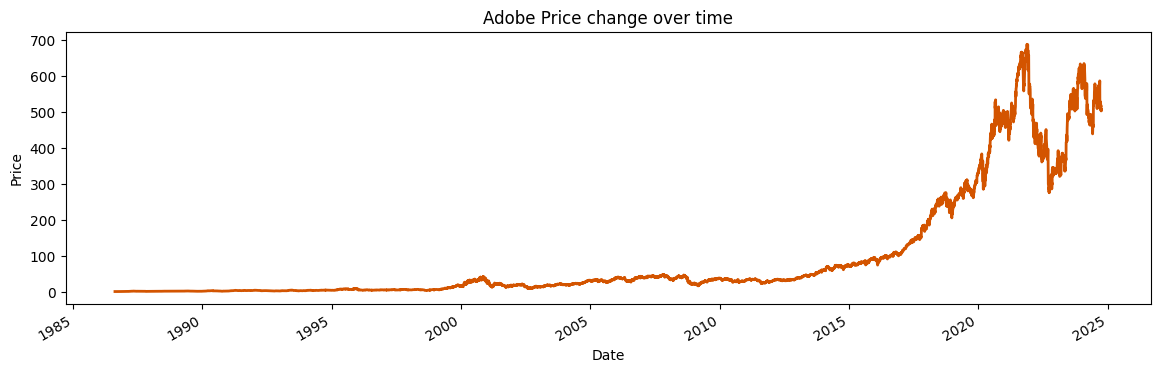

In [95]:
#Chart of Adobe Price change over time
adbe.set_index('Date')['Close'].plot(linewidth=2, figsize=(14, 4), color='#d35400')
plt.title('Adobe Price change over time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [96]:
#Defining the normalization od Adobe Closing Price
adbe['close_point_relative_normalization'] = adbe.groupby('iso_week')['Close'].transform(
    lambda x: norm.point_relative_normalization(x))
print(adbe)

           Date   Close iso_week  close_point_relative_normalization
0    1986-08-14    0.21  1986-33                            0.000000
1    1986-08-15    0.20  1986-33                           -0.047619
2    1986-08-18    0.20  1986-34                            0.000000
3    1986-08-19    0.20  1986-34                            0.000000
4    1986-08-20    0.20  1986-34                            0.000000
...         ...     ...      ...                                 ...
9605 2024-09-30  517.78  2024-40                            0.000000
9606 2024-10-01  502.80  2024-40                           -0.028931
9607 2024-10-02  505.81  2024-40                           -0.023118
9608 2024-10-03  503.80  2024-40                           -0.027000
9609 2024-10-04  507.22  2024-40                           -0.020395

[9610 rows x 4 columns]


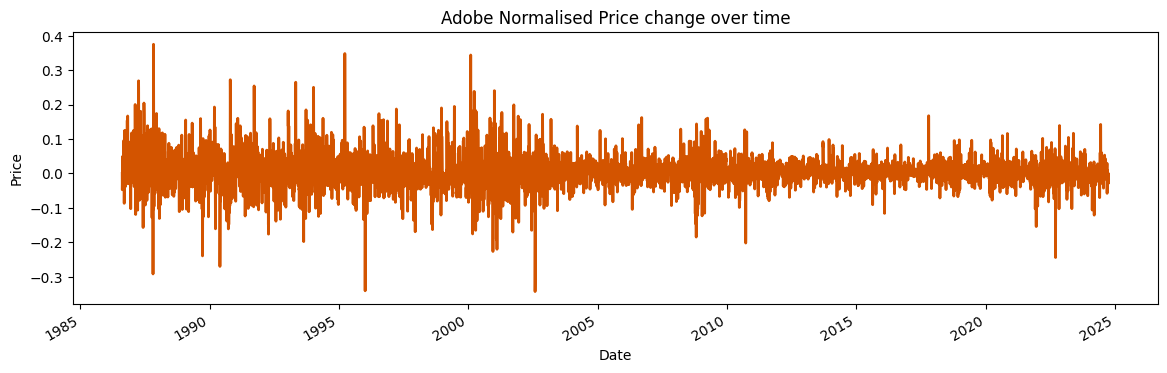

In [97]:
adbe.set_index('Date')['close_point_relative_normalization'].plot(
    linewidth=2, figsize=(14, 4), color='#d35400')
plt.title('Adobe Normalised Price change over time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [98]:
#Checking the Stationary of the Adobe Closing Price
#p-value > 0.05: Fail to reject the null hypothesis (H0), the data has a unit root and is non-stationary.
#p-value <= 0.05: Reject the null hypothesis (H0), the data does not have a unit root and is stationary.
result = adfuller(adbe['Close'])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])
print('Critical Values:')
for key, value in result[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: 0.273477
p-value: 0.976094
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


Log transform the dataset again to make the distribution of values more linear and better meet the expectations of this statistical test.

In [99]:
adbe['Close_log'] = np.log(adbe['Close'])
result2 = adfuller(adbe['Close_log'])
print('ADF Statistic: %f' % result2[0])
print('p-value: %f' % result2[1])
print('Critical Values:')
for key, value in result2[4].items():
 print('\t%s: %.3f' % (key, value))

ADF Statistic: -1.747582
p-value: 0.406778
Critical Values:
	1%: -3.431
	5%: -2.862
	10%: -2.567


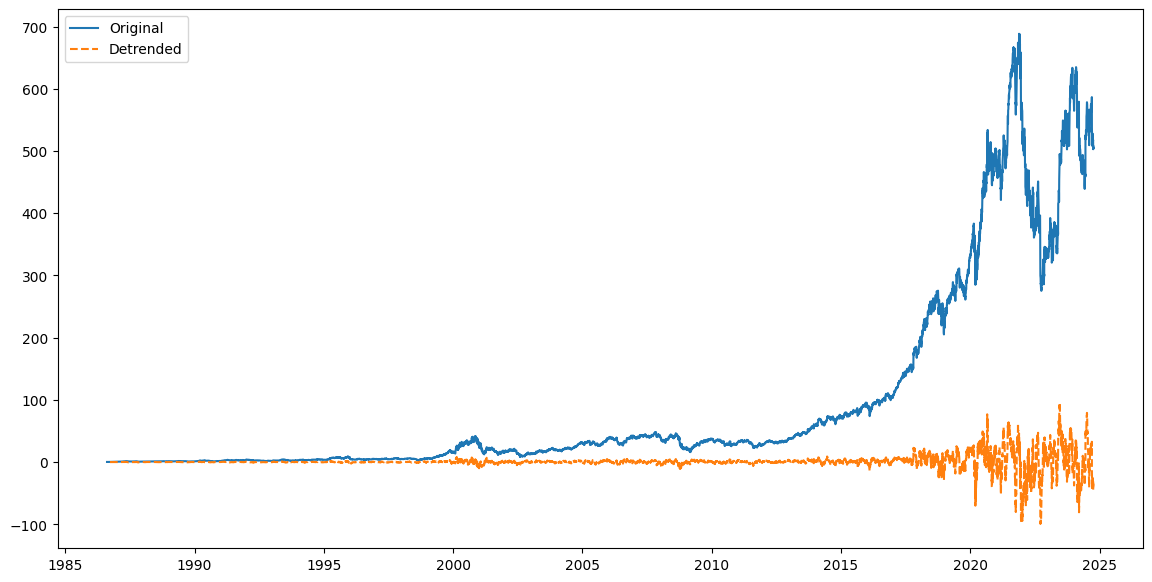

In [100]:
# Detrending using a rolling window
adbe_detrended = adbe['Close'] - adbe['Close'].rolling(window=30).mean()

# Plot original and detrended series
plt.figure(figsize=(14, 7))
plt.plot(adbe['Date'],adbe['Close'], label='Original')
plt.plot(adbe['Date'],adbe_detrended, label='Detrended', linestyle='--')
plt.legend()
plt.show()

In [101]:
# Drop NaN values
adbe_detrended = adbe['Close'] - adbe['Close'].rolling(window=30).mean()
adbe_detrended = adbe_detrended.dropna()

#Checking the AUF test after Detrending series
result3 = adfuller(adbe_detrended)
print(f'ADF Statistic (Detrended): {result3[0]}')
print(f'p-value (Detrended): {result3[1]}')
print(f'Critical Values (Detrended): {result3[4]}')

ADF Statistic (Detrended): -12.056689451819592
p-value (Detrended): 2.5239610153755816e-22
Critical Values (Detrended): {'1%': -3.43103550199564, '5%': -2.861842949503485, '10%': -2.5669312549133023}


A significantly low value of p suggests that there is strong evidence against
the null hypothesis. In this case, the null hypothesis assumes that the time series has a unit root,which means it is non-stationary. Therefore, a low p value allows us to reject the null hypothesis and conclude that, after removing the trend, the time series in stationary.

#Preprocessing the Combined Dataset -IN PROCESS

In [102]:
import sys
sys.path.append('/content/drive/MyDrive/studia/Inżynierka/MAIN/')
import yfiDownloader as yf

In [107]:
#Removing all data from 'data' folder
import shutil

shutil.rmtree('/content/drive/MyDrive/studia/Inżynierka/MAIN/data')

In [ ]:
#Loading the dataset with hourly stock prices for values in USD.
yf.download_sp500(interval='1h', split=True)

In [109]:
#Reading the actual data
adbe2 = pd.read_csv('/content/drive/MyDrive/studia/Inżynierka/MAIN/data/sp500/ADBE_1h.csv',usecols = ['Datetime','Close'])

adbe2['Datetime'] = pd.to_datetime(adbe2['Datetime'], utc=True)
# Creating the 'iso_week' column to prepare the normalization of closing price
adbe2['iso_week'] = adbe2['Datetime'].dt.isocalendar().year.astype(str) + '-' + adbe2['Datetime'].dt.isocalendar().week.astype(str)

In [110]:
#Checking for missing values
missing_values = adbe2.isnull().sum()

#Checking the presence of missing values
print("\nPresence of missing values:")
print(adbe2.isnull().any())


Presence of missing values:
Datetime    False
Close       False
iso_week    False
dtype: bool


In [111]:
print(adbe2.info)

<bound method DataFrame.info of                       Datetime       Close iso_week
0    2022-10-10 13:30:00+00:00  285.329987  2022-41
1    2022-10-10 14:30:00+00:00  285.149994  2022-41
2    2022-10-10 15:30:00+00:00  284.579987  2022-41
3    2022-10-10 16:30:00+00:00  284.559998  2022-41
4    2022-10-10 17:30:00+00:00  284.489990  2022-41
...                        ...         ...      ...
3479 2024-10-04 15:30:00+00:00  506.739990  2024-40
3480 2024-10-04 16:30:00+00:00  506.679993  2024-40
3481 2024-10-04 17:30:00+00:00  506.404999  2024-40
3482 2024-10-04 18:30:00+00:00  507.415009  2024-40
3483 2024-10-04 19:30:00+00:00  507.029999  2024-40

[3484 rows x 3 columns]>


Concatenating the datasets.

In [112]:
combined_data = pd.concat([adbe, adbe2], axis=0)

In [113]:
print(combined_data)

           Date       Close iso_week  close_point_relative_normalization  \
0    1986-08-14    0.210000  1986-33                            0.000000   
1    1986-08-15    0.200000  1986-33                           -0.047619   
2    1986-08-18    0.200000  1986-34                            0.000000   
3    1986-08-19    0.200000  1986-34                            0.000000   
4    1986-08-20    0.200000  1986-34                            0.000000   
...         ...         ...      ...                                 ...   
3479        NaT  506.739990  2024-40                                 NaN   
3480        NaT  506.679993  2024-40                                 NaN   
3481        NaT  506.404999  2024-40                                 NaN   
3482        NaT  507.415009  2024-40                                 NaN   
3483        NaT  507.029999  2024-40                                 NaN   

      Close_log                  Datetime  
0     -1.560648                       NaT  

In [114]:
# Ensuring both DataFrames have timezone-aware datetime objects
adbe['Datetime'] = pd.to_datetime(adbe['Date'])  # Convert to datetime objects if necessary
adbe['Datetime'] = adbe['Datetime'].dt.tz_localize('UTC')  # Assign a timezone (UTC)

combined_data = pd.concat([adbe, adbe2], axis=0)
combined_data = combined_data.sort_values(by='Datetime').reset_index(drop=True)

In [115]:
print(combined_data)

            Date       Close iso_week  close_point_relative_normalization  \
0     1986-08-14    0.210000  1986-33                            0.000000   
1     1986-08-15    0.200000  1986-33                           -0.047619   
2     1986-08-18    0.200000  1986-34                            0.000000   
3     1986-08-19    0.200000  1986-34                            0.000000   
4     1986-08-20    0.200000  1986-34                            0.000000   
...          ...         ...      ...                                 ...   
13089        NaT  506.739990  2024-40                                 NaN   
13090        NaT  506.679993  2024-40                                 NaN   
13091        NaT  506.404999  2024-40                                 NaN   
13092        NaT  507.415009  2024-40                                 NaN   
13093        NaT  507.029999  2024-40                                 NaN   

       Close_log                  Datetime  
0      -1.560648 1986-08-14 00